In [4]:
import matplotlib.pyplot as plt
import numpy as np
import random
import shutil
import os
import cv2
from ultralytics import YOLO

In [ ]:
image_path = './IAM_dataset_lines/formsA-Z/a01-000u.png'
image = cv2.imread(image_path)
plt.imshow(image)
plt.axis('off')
plt.tight_layout()

In [ ]:
x,y,w,h = 408,746,1663,91
cv2.rectangle(image, (x,y), (x+w, y+h), (255,0,0), 2)
plt.imshow(image)
plt.axis('off')
plt.tight_layout()

In [ ]:
iam_dir = './IAM_dataset_lines'

train_images_dir = os.path.join(iam_dir, 'images/train')
val_images_dir = os.path.join(iam_dir, 'images/val')
test_images_dir = os.path.join(iam_dir, 'images/test')

train_labels_dir = os.path.join(iam_dir, 'labels/train')
val_labels_dir = os.path.join(iam_dir, 'labels/val')
test_labels_dir = os.path.join(iam_dir, 'labels/test')

In [ ]:
os.makedirs(train_images_dir, exist_ok=True)
os.makedirs(val_images_dir, exist_ok=True)
os.makedirs(test_images_dir, exist_ok=True)

os.makedirs(train_labels_dir, exist_ok=True)
os.makedirs(val_labels_dir, exist_ok=True)
os.makedirs(test_labels_dir, exist_ok=True)

In [ ]:
def convert_to_yolo(x, y, w, h):
  IMG_WIDTH = 2479
  IMG_HEIGHT = 3542

  x_center = (x+w/2)/IMG_WIDTH
  y_center = (y+h/2)/IMG_HEIGHT
  width = w/IMG_WIDTH
  height = h/IMG_HEIGHT

  return x_center, y_center, width, height

In [ ]:
ascii_forms_path = 'IAM_dataset_lines/ascii/forms.txt'
ascii_forms = open(ascii_forms_path, 'r')

ascii_words_path = 'IAM_dataset_lines/ascii/lines.txt'
ascii_lines = open(ascii_words_path, 'r').readlines()

output_dir = 'IAM_dataset_lines/labelsA-Z'

for forms_line in ascii_forms:
  if(forms_line[0] == '#'):
    continue

  forms_words = forms_line.strip().split()
  current_form = forms_words[0]

  annot_path = os.path.join(output_dir, f"{current_form}.txt")
  
  for line in ascii_lines:
    if line[0] == '#':
      continue
      
    words = line.strip().split()

    if (words[0][:len(current_form)] == current_form) & (words[0][len(current_form)] == '-'):
      x,y,w,h = map(int, words[4:8])
      x_center, y_center, width, height = convert_to_yolo(x,y,w,h)

      with open(annot_path, 'a') as annot_file:
        annot_file.write(f"{0} {x_center} {y_center} {width} {height}\n")


In [ ]:
formsAZ_path = 'IAM_dataset_lines/formsA-Z'
labelsAZ_path = 'IAM_dataset_lines/labelsA-Z'


In [ ]:
forms_count = 0
labels_count = 0
for file in os.listdir(formsAZ_path):
  forms_count += 1
for file in os.listdir(labelsAZ_path):
  labels_count += 1

print(f"{forms_count} forms\n{labels_count} labels")

In [ ]:
image_files = [file for file in os.listdir(formsAZ_path)]
len(image_files)

In [ ]:
random.shuffle(image_files)
image_files[:10]

In [ ]:
# Split the data
train_size = int(0.8 * len(image_files))
val_size = int(0.1 * len(image_files)) + 1

train_size + 2*val_size

In [ ]:
train_set = image_files[:train_size]
print(f'The last image in training set: {train_set[-1]}')
print(f'{len(train_set)} images')

In [ ]:
val_set = image_files[train_size:train_size+val_size]
print(f'The first image in validation set: {val_set[0]}')
print(f'The last image in validation set: {val_set[-1]}')
print(f'{len(val_set)} images')

In [ ]:
test_set = image_files[train_size+val_size:]
print(f'The first image in testing set: {test_set[0]}')
print(f'{len(test_set)} images')

In [ ]:
def move_files(split_set, image_dest, label_dest):
  for file in split_set:
    # Move image
    image = os.path.join(formsAZ_path, file)
    image_output = os.path.join(image_dest, file)
    shutil.copy(image, image_output)

    # Move label 
    label_name = file.rsplit('.')[0] + '.txt'
    label = os.path.join(labelsAZ_path, label_name)
    label_output = os.path.join(label_dest, label_name)
    shutil.copy(label, label_output)

In [ ]:
move_files(train_set, train_images_dir, train_labels_dir)
move_files(val_set, val_images_dir, val_labels_dir)
move_files(test_set, test_images_dir, test_labels_dir)

In [ ]:
# Count all images

count = 0
for file in os.listdir(train_images_dir):
  count += 1
for file in os.listdir(val_images_dir):
  count += 1
for file in os.listdir(test_images_dir):
  count += 1

count

In [ ]:
# Count all labels

count = 0
for file in os.listdir(train_labels_dir):
  count += 1
for file in os.listdir(val_labels_dir):
  count += 1
for file in os.listdir(test_labels_dir):
  count += 1

count

In [ ]:
# Count train images and labels

count = 0
for file in os.listdir(train_images_dir):
  count += 1
print(count)

count = 0
for file in os.listdir(train_labels_dir):
  count += 1
print(count)

In [ ]:
# Count val images and labels

count = 0
for file in os.listdir(val_images_dir):
  count += 1
print(count)

count = 0
for file in os.listdir(val_labels_dir):
  count += 1
print(count)

In [ ]:
# Count test images and labels

count = 0
for file in os.listdir(test_images_dir):
  count += 1
print(count)

count = 0
for file in os.listdir(test_labels_dir):
  count += 1
print(count)

In [5]:
yolo_model = YOLO('lines.pt')

(-0.5, 709.5, 709.5, -0.5)

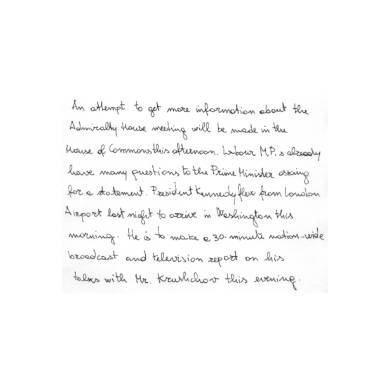

In [6]:
image_path = 'image2.png'
image = cv2.imread(image_path)

h,w = image.shape[:2]
new_size = max(h,w) + 200

padded_image = np.full((new_size, new_size, 3), (255,255,255), dtype=np.uint8)

# Calculate the position to place the original image
x_offset = (new_size - w) // 2
y_offset = (new_size - h) // 2

# Place the original image in the center
padded_image[y_offset:y_offset + h, x_offset:x_offset + w] = image

plt.imshow(padded_image)
plt.axis('off')


0: 640x640 9 Lines, 316.1ms
Speed: 2.2ms preprocess, 316.1ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


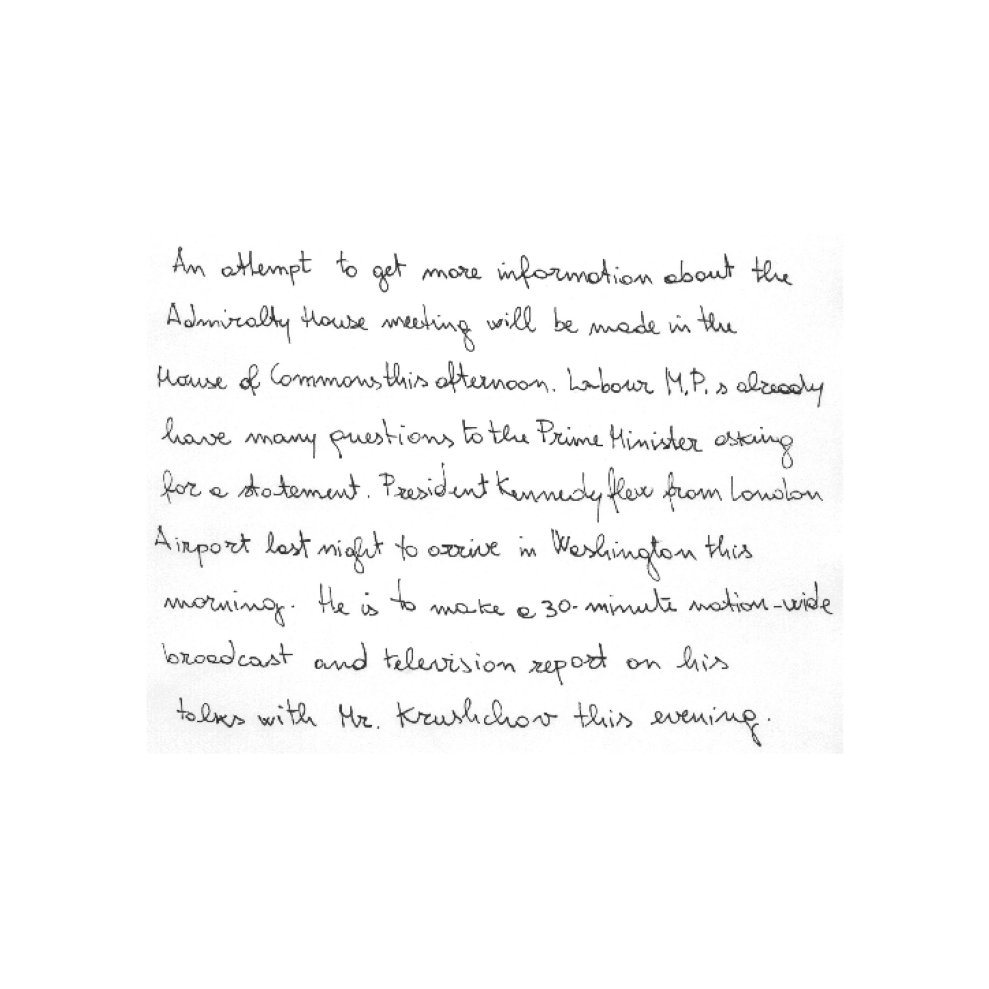

In [7]:
# image = cv2.resize(padded_image, (640, 640))
image = padded_image
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image = cv2.merge([image, image, image])

results = yolo_model.predict(image, conf=0.1, iou=0.3)
regions = []
padding = 2

for result in results:
  for box in result.boxes:
    x1, y1, x2, y2 = map(int, box.xyxy[0])

    if (y2-y1 < 5) | (x2-x1 < 5):
      continue

    regions.append([x1, y1, x2, y2])

    # cv2.rectangle(image, (x1,y1), (x2, y2), (255,0,0), 1)
    

plt.figure(figsize=(10,10))
plt.imshow(image)
plt.axis('off')
plt.tight_layout()



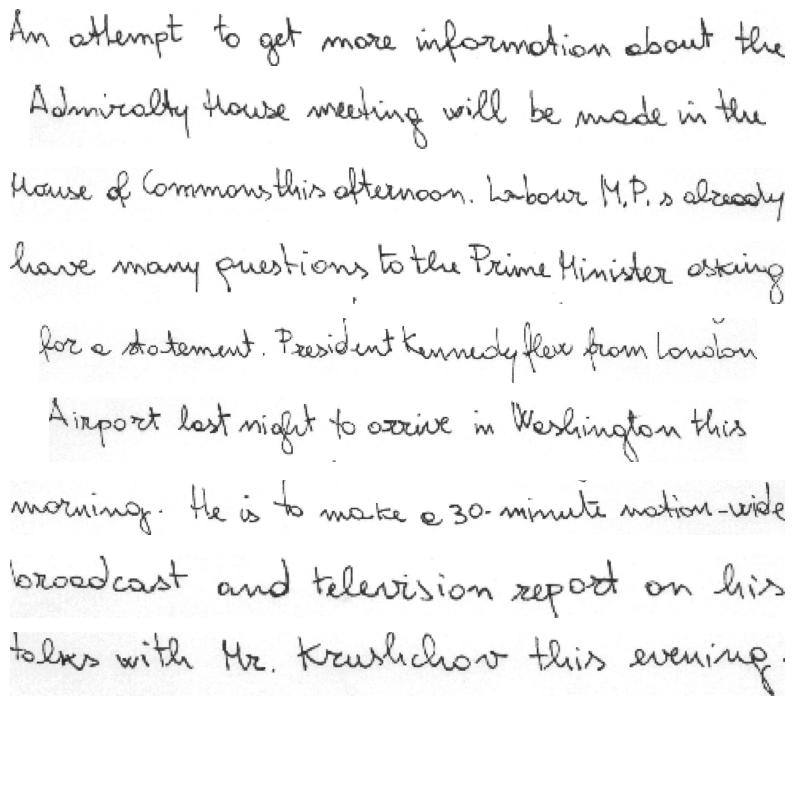

In [8]:
regions = sorted(regions, key=lambda coords:coords[1])
lines = []
for region in regions:
  lines.append(image[region[1]:region[3], region[0]:region[2]])

cols = 1
rows = int(len(regions)/cols) + 1
k = 0

fig, axs = plt.subplots(rows, cols, figsize=(cols*10, rows))
for i in range(rows):
  if k < len(lines):
    axs[i].imshow(lines[k])
    axs[i].axis('off')
    k+=1
  else:
    axs[i].axis('off')